# Select and filter data
### Slice and dice to get a subsets of pandas data

A crucial part of working with DataFrames is extracting subsets of the data: finding rows that meet a certain set of criteria, isolating columns/rows of interest, etc. After narrowing down our data, we are closer to discovering insights. This section will be the backbone of many analysis tasks.

The axis labeling information in pandas objects serves many purposes:

* Identifies data (i.e. provides metadata) using known indicators, important for analysis, visualization, and interactive console display.

* Enables automatic and explicit data alignment.

* Allows intuitive getting and setting of subsets of the data set.

In this section, we will focus on the final point: namely, how to slice, dice, and generally get and set subsets of pandas objects. The primary focus will be on Series and DataFrame as they have received more development attention in this area.

* References
 https://pandas.pydata.org/docs/user_guide/indexing.html

In [1]:
import pandas as pd

meteorites = pd.read_csv('data/Meteorite_Landings.csv')

## Selecting columns

We can select columns as attributes if their names would be valid Python variables:

In [2]:
meteorites.name

0            Aachen
1            Aarhus
2              Abee
3          Acapulco
4           Achiras
            ...    
45711    Zillah 002
45712        Zinder
45713          Zlin
45714     Zubkovsky
45715    Zulu Queen
Name: name, Length: 45716, dtype: object

If they aren't, we have to select them as keys. However, we can select multiple columns at once this way:

In [3]:
meteorites[['name', 'mass (g)']]

,name,mass (g)
0,Aachen,21.0
1,Aarhus,720.0
2,Abee,107000.0
3,Acapulco,1914.0
4,Achiras,780.0
...,...,...
45711,Zillah 002,172.0
45712,Zinder,46.0
45713,Zlin,3.3
45714,Zubkovsky,2167.0


## Selecting rows

In [4]:
meteorites[100:104]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
100,Benton,5026,Valid,LL6,2840.0,Fell,01/01/1949 12:00:00 AM,45.95000,-67.55000,"(45.95, -67.55)"
101,Berduc,48975,Valid,L6,270.0,Fell,01/01/2008 12:00:00 AM,-31.91000,-58.32833,"(-31.91, -58.32833)"
102,Béréba,5028,Valid,Eucrite-mmict,18000.0,Fell,01/01/1924 12:00:00 AM,11.65000,-3.65000,"(11.65, -3.65)"
103,Berlanguillas,5029,Valid,L6,1440.0,Fell,01/01/1811 12:00:00 AM,41.68333,-3.80000,"(41.68333, -3.8)"


## Different choices for indexing - selecting rows and columns



Object selection has had a number of user-requested additions in order to support more explicit location based indexing. pandas now supports three types of multi-axis indexing.

* <b>.loc[] </b> is primarily label based, but may also be used with a boolean array. .loc will raise KeyError when the items are not found. Allowed inputs are:
>
    - A single label, e.g. 5 or 'a' (Note that 5 is interpreted as a label of the index. This use is not an integer position along the index.).

    - A list or array of labels ['a', 'b', 'c'].

    - A slice object with labels 'a':'f' (Note that contrary to usual Python slices, both the start and the stop are included, when present in the index! See Slicing with labels and Endpoints are inclusive.)

    - A boolean array (any NA values will be treated as False).

    - A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above).
    
* <b>.iloc[] </b> is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. .iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with Python/NumPy slice semantics). Allowed inputs are:
> 
    - An integer e.g. 5.

    - A list or array of integers [4, 3, 0].

    -A slice object with ints 1:7.

    -A boolean array (any NA values will be treated as False).

    - A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above).


* <b>[][] </b>  chained indexing.   This selection is for viewing or copying only.  Do not use this method for assignment.  Assignment will fai when using chaied indexing

https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-view-versus-copy


## Indexing  - iloc[] with row and column numbers

We use `iloc[]` to select rows and columns by their position:

In [17]:
meteorites.iloc[100:104, [0, 3, 4, 6]]

,name,recclass,mass (g),year
100,Benton,LL6,2840.0,01/01/1949 12:00:00 AM
101,Berduc,L6,270.0,01/01/2008 12:00:00 AM
102,Béréba,Eucrite-mmict,18000.0,01/01/1924 12:00:00 AM
103,Berlanguillas,L6,1440.0,01/01/1811 12:00:00 AM


## Indexing  - loc[] with row and column names

We use `loc[]` to select by name:

In [7]:
meteorites.loc[100:104, 'mass (g)':'year']

,mass (g),fall,year
100,2840.0,Fell,01/01/1949 12:00:00 AM
101,270.0,Fell,01/01/2008 12:00:00 AM
102,18000.0,Fell,01/01/1924 12:00:00 AM
103,1440.0,Fell,01/01/1811 12:00:00 AM
104,960.0,Fell,01/01/2004 12:00:00 AM


## Indexing - [][]   chained indexing

In [8]:
# select columns and then rows
meteorites[['mass (g)', 'fall', 'year']][100:104]

,mass (g),fall,year
100,2840.0,Fell,01/01/1949 12:00:00 AM
101,270.0,Fell,01/01/2008 12:00:00 AM
102,18000.0,Fell,01/01/1924 12:00:00 AM
103,1440.0,Fell,01/01/1811 12:00:00 AM


In [10]:
# or indexing rows first and then columns
meteorites[100:104][['mass (g)', 'fall', 'year']]

,mass (g),fall,year
100,2840.0,Fell,01/01/1949 12:00:00 AM
101,270.0,Fell,01/01/2008 12:00:00 AM
102,18000.0,Fell,01/01/1924 12:00:00 AM
103,1440.0,Fell,01/01/1811 12:00:00 AM


In [12]:
# same as .loc[] , which is preferred:
meteorites.loc[100:104, ['mass (g)', 'fall', 'year']]

,mass (g),fall,year
100,2840.0,Fell,01/01/1949 12:00:00 AM
101,270.0,Fell,01/01/2008 12:00:00 AM
102,18000.0,Fell,01/01/1924 12:00:00 AM
103,1440.0,Fell,01/01/1811 12:00:00 AM
104,960.0,Fell,01/01/2004 12:00:00 AM


## Filtering with Boolean masks

A **Boolean mask** is a array-like structure of Boolean values &ndash; it's a way to specify which rows/columns we want to select (`True`) and which we don't (`False`).

Here's an example of a Boolean mask for meteorites weighing more than 50 grams that were found on Earth (i.e., they were not observed falling):

In [19]:
(meteorites['mass (g)'] > 50) & (meteorites.fall == 'Found')

0        False
1        False
2        False
3        False
4        False
         ...  
45711     True
45712    False
45713    False
45714     True
45715     True
Length: 45716, dtype: bool

**Important**: Take note of the syntax here. We surround each condition with parentheses, and we use bitwise operators (`&`, `|`, `~`) instead of logical operators (`and`, `or`, `not`).

We can use this Boolean mask to select the full row for each of these meteorites:

In [20]:
meteorites[(meteorites['mass (g)'] > 50) & (meteorites.fall == 'Found')]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
37,Northwest Africa 5815,50693,Valid,L5,256.80,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
757,Dominion Range 03239,32591,Valid,L6,69.50,Found,01/01/2002 12:00:00 AM,NaN,NaN,NaN
804,Dominion Range 03240,32592,Valid,LL5,290.90,Found,01/01/2002 12:00:00 AM,NaN,NaN,NaN
1111,Abajo,4,Valid,H5,331.00,Found,01/01/1982 12:00:00 AM,26.80000,-105.41667,"(26.8, -105.41667)"
1112,Abar al' Uj 001,51399,Valid,H3.8,194.34,Found,01/01/2008 12:00:00 AM,22.72192,48.95937,"(22.72192, 48.95937)"
...,...,...,...,...,...,...,...,...,...,...
45709,Zhongxiang,30406,Valid,Iron,100000.00,Found,01/01/1981 12:00:00 AM,31.20000,112.50000,"(31.2, 112.5)"
45710,Zillah 001,31355,Valid,L6,1475.00,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45711,Zillah 002,31356,Valid,Eucrite,172.00,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45714,Zubkovsky,31357,Valid,L6,2167.00,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"


*Tip: Boolean masks can be used with `loc[]` and `iloc[]`.*

## Filter with query()
An alternative to this is the `query()` method.

DataFrame objects have a query() method that allows selection using an expression.

You can get the value of the frame where column b has values between the values of columns a and c. For example:


In [21]:
meteorites.query("`mass (g)` > 50 and fall == 'Found'")

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
37,Northwest Africa 5815,50693,Valid,L5,256.80,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
757,Dominion Range 03239,32591,Valid,L6,69.50,Found,01/01/2002 12:00:00 AM,NaN,NaN,NaN
804,Dominion Range 03240,32592,Valid,LL5,290.90,Found,01/01/2002 12:00:00 AM,NaN,NaN,NaN
1111,Abajo,4,Valid,H5,331.00,Found,01/01/1982 12:00:00 AM,26.80000,-105.41667,"(26.8, -105.41667)"
1112,Abar al' Uj 001,51399,Valid,H3.8,194.34,Found,01/01/2008 12:00:00 AM,22.72192,48.95937,"(22.72192, 48.95937)"
...,...,...,...,...,...,...,...,...,...,...
45709,Zhongxiang,30406,Valid,Iron,100000.00,Found,01/01/1981 12:00:00 AM,31.20000,112.50000,"(31.2, 112.5)"
45710,Zillah 001,31355,Valid,L6,1475.00,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45711,Zillah 002,31356,Valid,Eucrite,172.00,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45714,Zubkovsky,31357,Valid,L6,2167.00,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"


*Tip: Here, we can use both logical operators and bitwise operators.*

## Calculating summary statistics

In the next section of this workshop, we will discuss data cleaning for a more meaningful analysis of our datasets; however, we can already extract some interesting insights from the `meteorites` data by calculating summary statistics.

#### How many of the meteorites were found versus observed falling?

In [22]:
meteorites.fall.value_counts()

Found    44609
Fell      1107
Name: fall, dtype: int64

*Tip: Pass in `normalize=True` to see this result as percentages. Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) for additional functionality.*

#### What was the mass of the average meterorite?

In [23]:
meteorites['mass (g)'].median()

32.6

We can take this a step further and look at quantiles:

In [24]:
meteorites['mass (g)'].quantile([0.01, 0.05, 0.95, 0.99])

0.01        0.44
0.05        1.10
0.95     4000.00
0.99    50600.00
Name: mass (g), dtype: float64

#### What was the mass of the heaviest meteorite?

In [25]:
meteorites['mass (g)'].max()

60000000.0

Let's extract the information on this meteorite:

In [26]:
meteorites.loc[meteorites['mass (g)'].idxmax()]

name                             Hoba
id                              11890
nametype                        Valid
recclass                    Iron, IVB
mass (g)                   60000000.0
fall                            Found
year           01/01/1920 12:00:00 AM
reclat                      -19.58333
reclong                      17.91667
GeoLocation     (-19.58333, 17.91667)
Name: 16392, dtype: object

<AxesSubplot:>

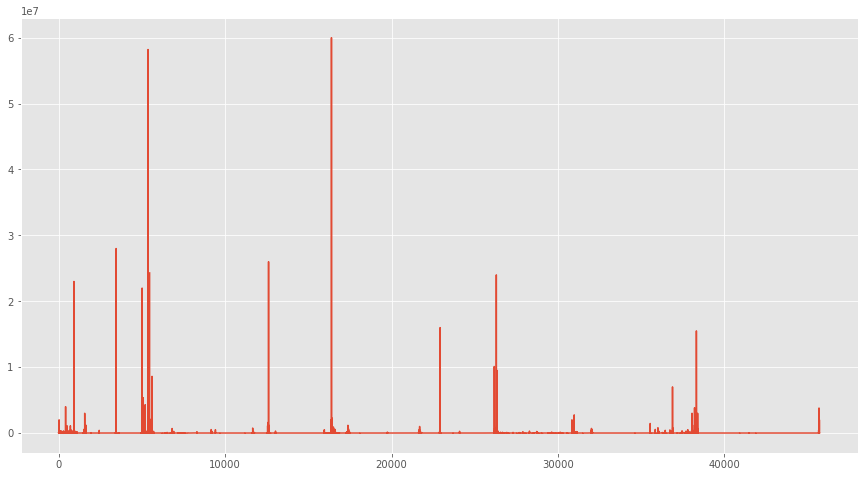

In [16]:
# Make the graphs a bit prettier, and bigger
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 8)
meteorites['mass (g)'].plot()

#### How many different types of meteorite classes are represented in this dataset?

In [27]:
meteorites.recclass.nunique()

466

Some examples:

In [28]:
meteorites.recclass.unique()[:14]

array(['L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6', 'H5', 'L',
       'Diogenite-pm', 'Unknown', 'H4', 'H', 'Iron, IVA', 'CR2-an'],
      dtype=object)

*Note: All fields preceded with "rec" are the values recommended by The Meteoritical Society. Check out [this Wikipedia article](https://en.wikipedia.org/wiki/Meteorite_classification) for some information on meteorite classes.*

#### Get some summary statistics on the data itself
We can get common summary statistics for all columns at once. By default, this will only be numeric columns, but here, we will summarize everything together:

In [29]:
meteorites.describe(include='all')

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
count,45716,45716.000000,45716,45716,4.558500e+04,45716,45425,38401.000000,38401.000000,38401
unique,45716,NaN,2,466,NaN,2,266,NaN,NaN,17100
top,Aachen,NaN,Valid,L6,NaN,Found,01/01/2003 12:00:00 AM,NaN,NaN,"(0.0, 0.0)"
freq,1,NaN,45641,8285,NaN,44609,3323,NaN,NaN,6214
mean,NaN,26889.735104,NaN,NaN,1.327808e+04,NaN,NaN,-39.122580,61.074319,NaN
std,NaN,16860.683030,NaN,NaN,5.749889e+05,NaN,NaN,46.378511,80.647298,NaN
min,NaN,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,-87.366670,-165.433330,NaN
25%,NaN,12688.750000,NaN,NaN,7.200000e+00,NaN,NaN,-76.714240,0.000000,NaN
50%,NaN,24261.500000,NaN,NaN,3.260000e+01,NaN,NaN,-71.500000,35.666670,NaN
75%,NaN,40656.750000,NaN,NaN,2.026000e+02,NaN,NaN,0.000000,157.166670,NaN


**Important**: `NaN` values signify missing data. For instance, the `fall` column contains strings, so there is no value for `mean`; likewise, `mass (g)` is numeric, so we don't have entries for the categorical summary statistics (`unique`, `top`, `freq`).

#### Check out the documentation for more descriptive statistics:

- [Series](https://pandas.pydata.org/docs/reference/series.html#computations-descriptive-stats)
- [DataFrame](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)

### Exercises

##### 1. Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file:

##### 2. Find the dimensions (number of rows and number of columns) in the data:

##### 3. Calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns:

##### 4. Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip (`trip_distance`):

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  